<a href="https://colab.research.google.com/github/Russo-Federico/DeepLearningFundamentals/blob/main/IBM-PyTorch-Basics/0-PyTorchBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Basic operations on tensors

In [3]:
torch_tensor = torch.tensor([1,2,3,4,5])
print(torch_tensor)

torch_tensor_casting = torch.tensor([1,2,3,4,5], dtype=torch.float32)
print(torch_tensor_casting)

print(torch_tensor.dtype)
print(torch_tensor.type())

print(torch_tensor.ndimension())
a_col = torch_tensor.view(-1,1)
print(a_col)

tensor([1, 2, 3, 4, 5])
tensor([1., 2., 3., 4., 5.])
torch.int64
torch.LongTensor
1
tensor([[1],
        [2],
        [3],
        [4],
        [5]])


**N.B.** each element of a tensor is a tensor itself, to get the python number use the .item() funciton

In [4]:
print(torch_tensor[0])
print(torch_tensor[0].item())

tensor(1)
1


In [5]:
section_tensor = torch_tensor[1:3]
print(section_tensor)

tensor([2, 3])


assign new values to tensor elements

In [6]:
# single value
torch_tensor[2] = 7
print(torch_tensor)
print(section_tensor)

# multiple values
torch_tensor[1:3] = torch.tensor([27, 45])
print(torch_tensor)
print(section_tensor)

tensor([1, 2, 7, 4, 5])
tensor([2, 7])
tensor([ 1, 27, 45,  4,  5])
tensor([27, 45])


N.B as can be seen above, the tensor rifer to the original, so changing one changes all the others

Flowless integration within the python environment

In [7]:
numpy_array = np.array([9,8,7,6])
print(numpy_array)

to_torch = torch.from_numpy(numpy_array)
print(to_torch)

back_to_numpy = to_torch.numpy()
print(back_to_numpy)

[9 8 7 6]
tensor([9, 8, 7, 6])
[9 8 7 6]


# Basic Operations

In [8]:
# init
a = torch.tensor([1,2])
b = torch.tensor([3,4])

c = a+b
print(c)

# scalar product
c = c * 2
print(c)

# tensor product
c = a * b
print(c)

# dot product
c = torch.dot(a,b)
print(c)

# adding constant
c = a + 2
print(c)

tensor([4, 6])
tensor([ 8, 12])
tensor([3, 8])
tensor(11)
tensor([3, 4])


**universal functions**

In [9]:
a_float = a.type(torch.FloatTensor)
print(a_float)

# get mean
mean_a = a_float.mean()
print(mean_a)

# get max
a_max = a.max()
print(a_max)

tensor([1., 2.])
tensor(1.5000)
tensor(2)


tensor([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.])
tensor([ 0.9589,  0.7568, -0.1411, -0.9093, -0.8415,  0.0000,  0.8415,  0.9093,
         0.1411, -0.7568, -0.9589])


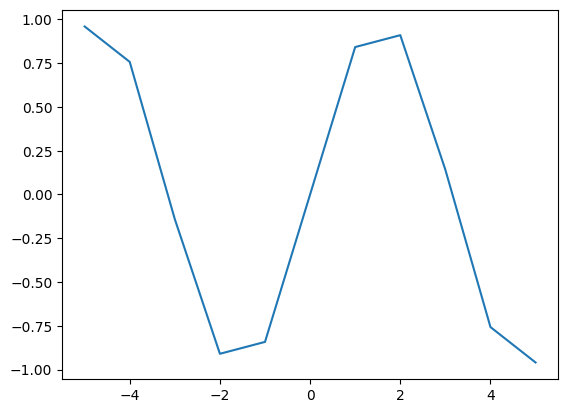

In [10]:
# linspace ideal for plotting funcitons
x = torch.linspace(-5,5,11) #starting point, ending point, steps
print(x)

y = torch.sin(x)
print(y)

plt.plot(x.numpy(), y.numpy())

# 2D Tensors

Create 2D tensors

In [11]:
a = [[0,1,2],[3,4,5],[6,7,8]]

my_tensor = torch.tensor(a)
print(my_tensor)

# rows and cols
print("Tensor size: ", my_tensor.shape)

# dimensions: 3x3 => 2 dim
print("Dimensions: ", my_tensor.ndimension())

print("Number of elements: ", my_tensor.numel())

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
Tensor size:  torch.Size([3, 3])
Dimensions:  2
Number of elements:  9


**Indexing & Slicing**

In [12]:
print(my_tensor[1][0])

print(my_tensor[0,1:])

print(my_tensor[1:,2])

print(my_tensor[1:,:-1])

tensor(3)
tensor([1, 2])
tensor([5, 8])
tensor([[3, 4],
        [6, 7]])


**Operations on 2D Tensors**

In [13]:
x = torch.tensor([[1,0],[0,1]])
y = torch.tensor([[2,1],[1,2]])

print(f"x: {x}")
print(f"y: {y}")

x: tensor([[1, 0],
        [0, 1]])
y: tensor([[2, 1],
        [1, 2]])


In [14]:
# add
z = x + y
print(z)

# multiply scalar
z = 2*z
print(z)

# hadamard product
z = x*y
print(z)

# matrix multiplications
a = torch.tensor([[0,1,1],[1,0,1]])
b = torch.tensor([[1,1],[1,1],[-1,1]])
c = torch.mm(a,b)
print(c)

tensor([[3, 1],
        [1, 3]])
tensor([[6, 2],
        [2, 6]])
tensor([[2, 0],
        [0, 2]])
tensor([[0, 2],
        [0, 2]])


# Differencition
<br>
calculating derivatives of a loss function with respect of model parameters to update weights and biases

In [15]:
# requires_grad => enable gradient tracking
# Track operations on this tensor, because I’ll want to compute gradients with respect to it later
x = torch.tensor(2., requires_grad=True)
y = x**2

# calculate derivative of y
y.backward()
print(x.grad)

x = torch.tensor(2., requires_grad=True)
z = x**2 + 2*x + 1
z.backward()
print(x.grad)

tensor(4.)
tensor(6.)


Partial derivatives

In [16]:
u = torch.tensor(1., requires_grad=True)
v = torch.tensor(2., requires_grad=True)

f = u*v + u**2

f.backward()
print(u.grad)
print(v.grad)

tensor(4.)
tensor(1.)


# Datasets

In [17]:
from torch.utils.data import Dataset

In [18]:
class toy_set(Dataset):
  def __init__(self, length=100, transform=None):
    self.len = length
    self.x = 2 * torch.ones(length, 2)  # tensor of 1s, two dimensions, mult per 2, number of elements=length
    self.y = torch.ones(length, 1)  # tensor of 1s, one dimension, number of elements=length
    self.transform = transform

  def __getitem__(self, index):
    sample = self.x[index], self.y[index]
    if self.transform:
      sample = self.transform(sample)
    return sample

  def __len__(self):
    return self.len

In [19]:
dataset = toy_set()

print(len(dataset))

print(dataset[0])

for i in range(3):
  x,y = dataset[i]
  print(f"x: {x}, y: {y}")

100
(tensor([2., 2.]), tensor([1.]))
x: tensor([2., 2.]), y: tensor([1.])
x: tensor([2., 2.]), y: tensor([1.])
x: tensor([2., 2.]), y: tensor([1.])


**Transfrom** data
in following example some classes will be created, these classese will apply *transforms* to the tensors

In [20]:
class add_mult(object):
  def __init__(self, addx=1, muly=1):
    self.addx=addx
    self.muly=muly

  def __call__(self, sample):
    x=sample[0]
    y=sample[1]
    x=x+self.addx
    y=y*self.muly
    sample=x,y
    return sample

In [21]:
dataset=toy_set()
print(f"Before transform: {dataset[0]}")

a_m = add_mult()
print(a_m)

x_,y_ = a_m(dataset[0])
print(x_,y_)
print(f"Before transform: {x_} {y_}")


Before transform: (tensor([2., 2.]), tensor([1.]))
tensor([3., 3.]) tensor([1.])
Before transform: tensor([3., 3.]) tensor([1.])


In [22]:
a_m = add_mult()
dataset = toy_set(transform=a_m)
print(dataset[0])

(tensor([3., 3.]), tensor([1.]))


Transform **Compose** class

In [23]:
from torchvision import transforms

In [24]:
class mult(object):
  def __init__(self, mul=100):
    self.mul=mul

  def __call__(self, sample):
    x=sample[0]
    y=sample[1]
    x=x*self.mul
    y=y*self.mul
    sample=x,y
    return sample

In [25]:
data_transform = transforms.Compose([add_mult(), mult()])

x_, y_ = data_transform(dataset[0])
print(f"After transform: {x_} {y_}")

After transform: tensor([400., 400.]) tensor([100.])


In [26]:
dataset_ = toy_set(transform=data_transform)
print(dataset_[0])

(tensor([300., 300.]), tensor([100.]))


# Linear Regression
linear equation

In [27]:
w = torch.tensor(2., requires_grad=True) #weight
b = torch.tensor(-1., requires_grad=True) #bias

def forward(x):
  y = w*x + b
  return y

x = torch.tensor([1.])

yhat = forward(x)
yhat

tensor([1.], grad_fn=<AddBackward0>)

**linear class** package

In [28]:
from torch.nn import Linear

In [29]:
# slope and bias randomly intialized, set seed to get same result at each run
torch.manual_seed(1)

# in_features => number of input cols
# out_features => size of each output sample
model = Linear(in_features=1, out_features=1)

# frist slope, secom bias
print(list(model.parameters()))

x = torch.tensor([0.])

# forward method called implictly
yhat = model(x)
print(yhat)

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]
tensor([-0.4414], grad_fn=<ViewBackward0>)


**custom module** package - wrap mutliple models together to make more complex modules

In [30]:
import torch.nn as nn

In [31]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super(LR, self).__init__()
    self.linear=nn.Linear(input_size, output_size)

  def forward(self, x):
    out=self.linear(x)
    return out

In [32]:
model = LR(1,1)

model.state_dict()['linear.weight'].data[0] = torch.tensor([0.5153])
model.state_dict()['linear.bias'].data[0] = torch.tensor([-0.4414])

print(list(model.parameters()))

x = torch.tensor([1.0])
yhat = model(x)
print(yhat)

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]
tensor([0.0739], grad_fn=<ViewBackward0>)


# Gradient descent

<function matplotlib.pyplot.show(close=None, block=None)>

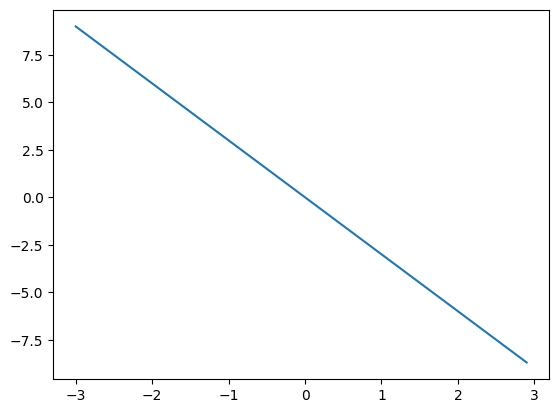

In [33]:
w = torch.tensor(-10., requires_grad=True)

X = torch.arange(-3,3,0.1).view(-1,1)
f = -3*X

plt.plot(X.numpy(), f.numpy())
plt.show

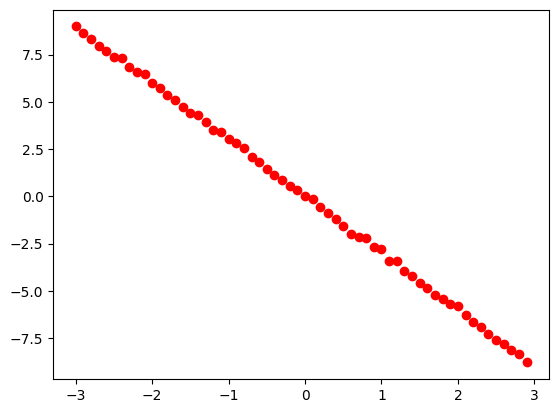

In [34]:
# add random noise over the line
Y = f+0.1*torch.randn(X.size())

plt.plot(X.numpy(), Y.numpy(),'ro')
plt.show()

In [35]:
def forward(x):
  return w*x

# define loss function as mse
def criterion(yhat, y):
  return torch.mean((yhat-2)**2)


# set learing rete
lr=0.1

cost=[]

for epoch in range(4):
  Yhat = forward(X)
  loss = criterion(Yhat, Y)
  # calc dericative with respect to all the variables in loss func
  loss.backward()
  # update the weights based on current data and the gradient times the lr
  w.data = w.data - lr*w.grad.data
  # set gradient to zero, this way the gradient in the next cycle will be only based on the updated weights
  w.grad.data.zero_()
  print(f"epoch: {epoch}, loss: {loss.item()}")

  cost.append(loss.item())

epoch: 0, loss: 302.1666564941406
epoch: 1, loss: 51.624366760253906
epoch: 2, loss: 11.604402542114258
epoch: 3, loss: 5.211877346038818


N.B. cost = avarage loss

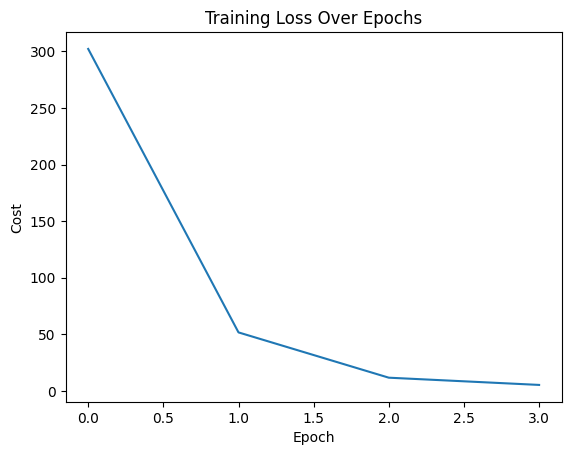

In [36]:
# graph, avarage loss per epoch
plt.plot(range(len(cost)), cost)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Training Loss Over Epochs')
plt.show()

In true linear regression, the cost function is of two variables the slope and bias, to truly capture the loss we have to consider both weights and biases as below

The cost is the average loss, it's a function of the slope.
The slope controls the relationship between x and y while the bias controls the horizontal offset.


In [37]:
def forward(x):
  return w*x + b

# define loss function as mse
def criterion(yhat, y):
  return torch.mean((yhat-2)**2)

w = torch.tensor(-15., requires_grad=True)
b = torch.tensor(-10., requires_grad=True)
X = torch.arange(-3,3,0.1).view(-1,1)
f = 1*x-1
Y = f+0.1*torch.randn(X.size())

lr=0.1

cost=[]

for epoch in range(10):
  Yhat = forward(X)
  loss = criterion(Yhat, Y)

  # calc dericative
  loss.backward()

  # update the weights
  w.data = w.data - lr*w.grad.data
  w.grad.data.zero_()

  # update the biases
  b.data = b.data - lr*b.grad.data
  b.grad.data.zero_()

  print(f"epoch: {epoch}, loss: {loss.item()}")

  cost.append(loss.item())

epoch: 0, loss: 801.375
epoch: 1, loss: 201.34234619140625
epoch: 2, loss: 79.18762969970703
epoch: 3, loss: 42.77460479736328
epoch: 4, loss: 26.1265926361084
epoch: 5, loss: 16.52944564819336
epoch: 6, loss: 10.553221702575684
epoch: 7, loss: 6.753136157989502
epoch: 8, loss: 4.3238844871521
epoch: 9, loss: 2.7688825130462646


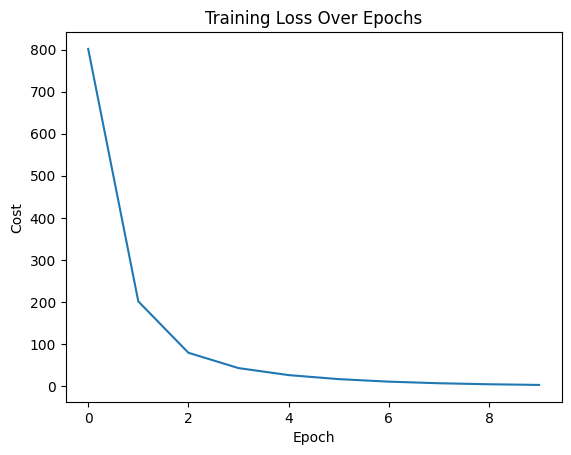

In [38]:
# graph, avarage loss per epoch
plt.plot(range(len(cost)), cost)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Training Loss Over Epochs')
plt.show()

# SGD w/ Optimizer

In [39]:
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

In [40]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super(LR, self).__init__()
    self.linear=nn.Linear(input_size, output_size)

  def forward(self, x):
    out=self.linear(x)
    return out

criterion = nn.MSELoss()

In [41]:
class Data(Dataset):

    # Constructor
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.y = 1 * X - 1
        self.len = self.x.shape[0]

    # Getter
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    # Get length
    def __len__(self):
        return self.len

dataset = Data()
trainloader = DataLoader(dataset=dataset, batch_size=1)

In [42]:
model = LR(1,1)

optimizer = optim.SGD(model.parameters(), lr=0.01) # model.parameters() - contains all learnable parameters
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.01,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'differentiable': False,
   'fused': None,
   'params': [0, 1]}]}

In [43]:
# loss and optimizer are implictly connected

for epoch in range(10):
  for x,y in trainloader:
    yhat = forward(x)
    loss = criterion(yhat, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()  # automate the updates to weights and biases

# Linear Class
import and use linear class to perform linear regression in multiple dimensions

In [44]:
from torch.nn import Linear

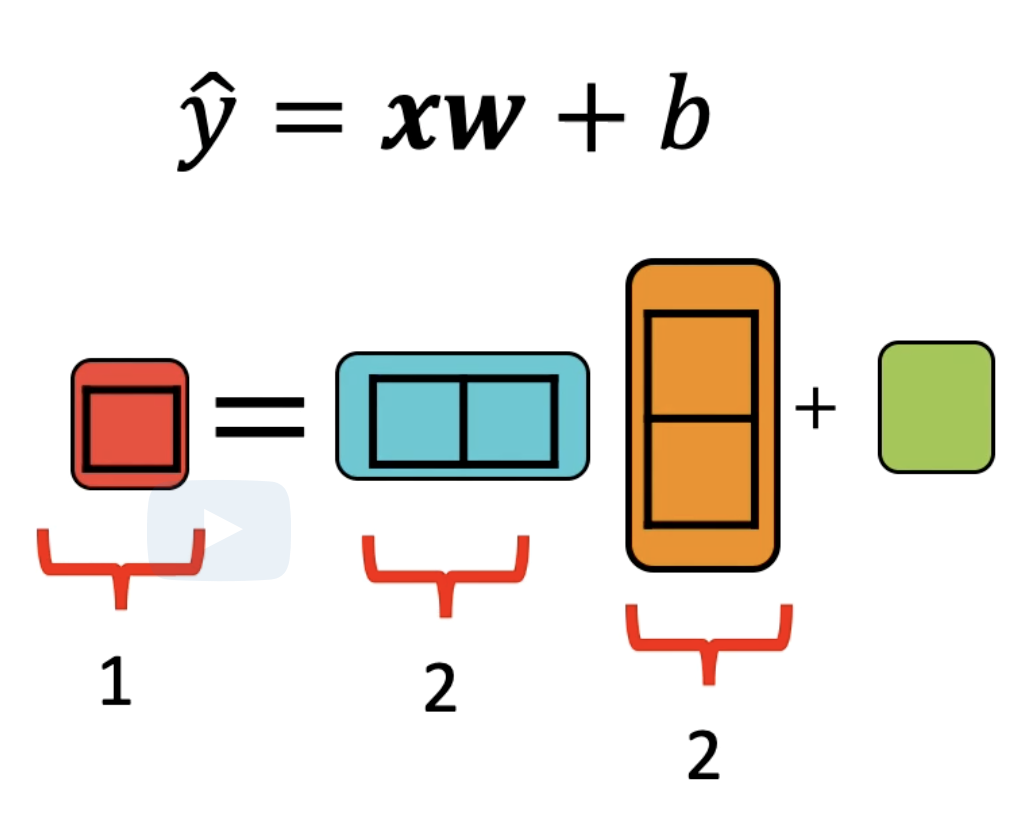

In [45]:
torch.manual_seed(1)

model = Linear(in_features=2, out_features=1)

# first weights, then bias
print("parameters() function: ", list(model.parameters()))

print("\nstate_dict() function: ", model.state_dict())

# 2 dim tensor - 3 row, 2 cols each
x = torch.tensor([[1.,1.],[1.,2.],[1.,3.]])
yhat = model(x)

# result is 3 by 1 tensor - 1 col per row
print("\nyhat: ", yhat)

parameters() function:  [Parameter containing:
tensor([[ 0.3643, -0.3121]], requires_grad=True), Parameter containing:
tensor([-0.1371], requires_grad=True)]

state_dict() function:  OrderedDict([('weight', tensor([[ 0.3643, -0.3121]])), ('bias', tensor([-0.1371]))])

yhat:  tensor([[-0.0848],
        [-0.3969],
        [-0.7090]], grad_fn=<AddmmBackward0>)


# Building NNs
Create a logistic regression model using PyTorch and nn.Sequential package

In [46]:
x = torch.arange(-3,3,0.1).view(-1,1)

# logistic regression, so we add a sigmoid function at the end
model = nn.Sequential(
    nn.Linear(1,1),
    nn.Sigmoid()
)

yhat = model(x)
print("yhat[0]: ", yhat[0])

yhat[0]:  tensor([0.0871], grad_fn=<SelectBackward0>)


In [47]:
class logistic_regression(nn.Module):
  def __init__(self, input_size):
    super(logistic_regression, self).__init__()
    self.linear = nn.Linear(input_size, 1)

  def forward(self, x):
    x = torch.sigmoid(self.linear(x))
    return x

model = logistic_regression(1)
yhat = model(x)
print("yhat[10]: ", yhat[10])

yhat[10]:  tensor([0.1970], grad_fn=<SelectBackward0>)


Implementing a loss function for the model

In [55]:
class logistic_regression(nn.Module):
  def __init__(self, input_size):
    super(logistic_regression, self).__init__()
    self.linear = nn.Linear(input_size, 1)

  def forward(self, x):
    x = torch.sigmoid(self.linear(x))
    return x

  # cross entropy
  #def criterion(yhat, y):
    #out = -1 * torch.mean(y * torch.log(yhat) + (1 - y) * torch.log(1 - yhat)))
    #return out

# alternative cross entropy loss
criterion = nn.BCELoss()

class Data(Dataset):

    # Constructor
    def __init__(self):
        self.x = torch.arange(-1, 1, 0.1).view(-1, 1)
        self.y = torch.zeros(self.x.shape[0], 1)
        self.y[self.x[:, 0] > 0.2] = 1
        self.len = self.x.shape[0]

    # Getter
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    # Get Length
    def __len__(self):
        return self.len

dataset = Data()
trainloader = DataLoader(dataset=dataset, batch_size=1)

model = logistic_regression(1)
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(100):
  for x, y in trainloader:
    yhat = model(x)
    loss = criterion(yhat, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()